In [1]:
# ----------------------------------------------
#           ***  MOUNT DRIVE  ***
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/Mount.txt', 'r') as file:
    print(file.read())
# ==============================================

Mounted at /content/drive
Mount successful!


In [2]:
# ----------------------------------------------
#          ***  IMPORTS BASIC  ***
from os import listdir, mkdir 
from os.path import isfile, join, exists
import pickle
import random
import datetime
import time
import math

def seconds_to_m_s(seconds):
    minutes = math.floor(seconds // 60)
    seconds = math.ceil(seconds % 60)
    return minutes, seconds

start_work = time.time()
print('Start work at:', datetime.datetime.now().strftime("%H:%M:%S %Y.%m.%d"))
print("\nAll work took {} minutes {} seconds".format(*seconds_to_m_s(time.time() - start_work)))
# ==============================================

Start work at: 15:05:55 2020.10.05

All work took 0 minutes 1 seconds


In [3]:
# ----------------------------------------------
#         ***  IMPORTS PROJECT  ***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# ==============================================

In [4]:
# ----------------------------------------------
#            ***  DIRECTORY  ***
base_dir = '/content/drive/My Drive/'
dataset_dir = join(base_dir, 'Datasets', 'jena_climate')
file_path = join(dataset_dir, 'jena_climate_2009_2016.csv')
# ==============================================

In [5]:
df = pd.read_csv(file_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


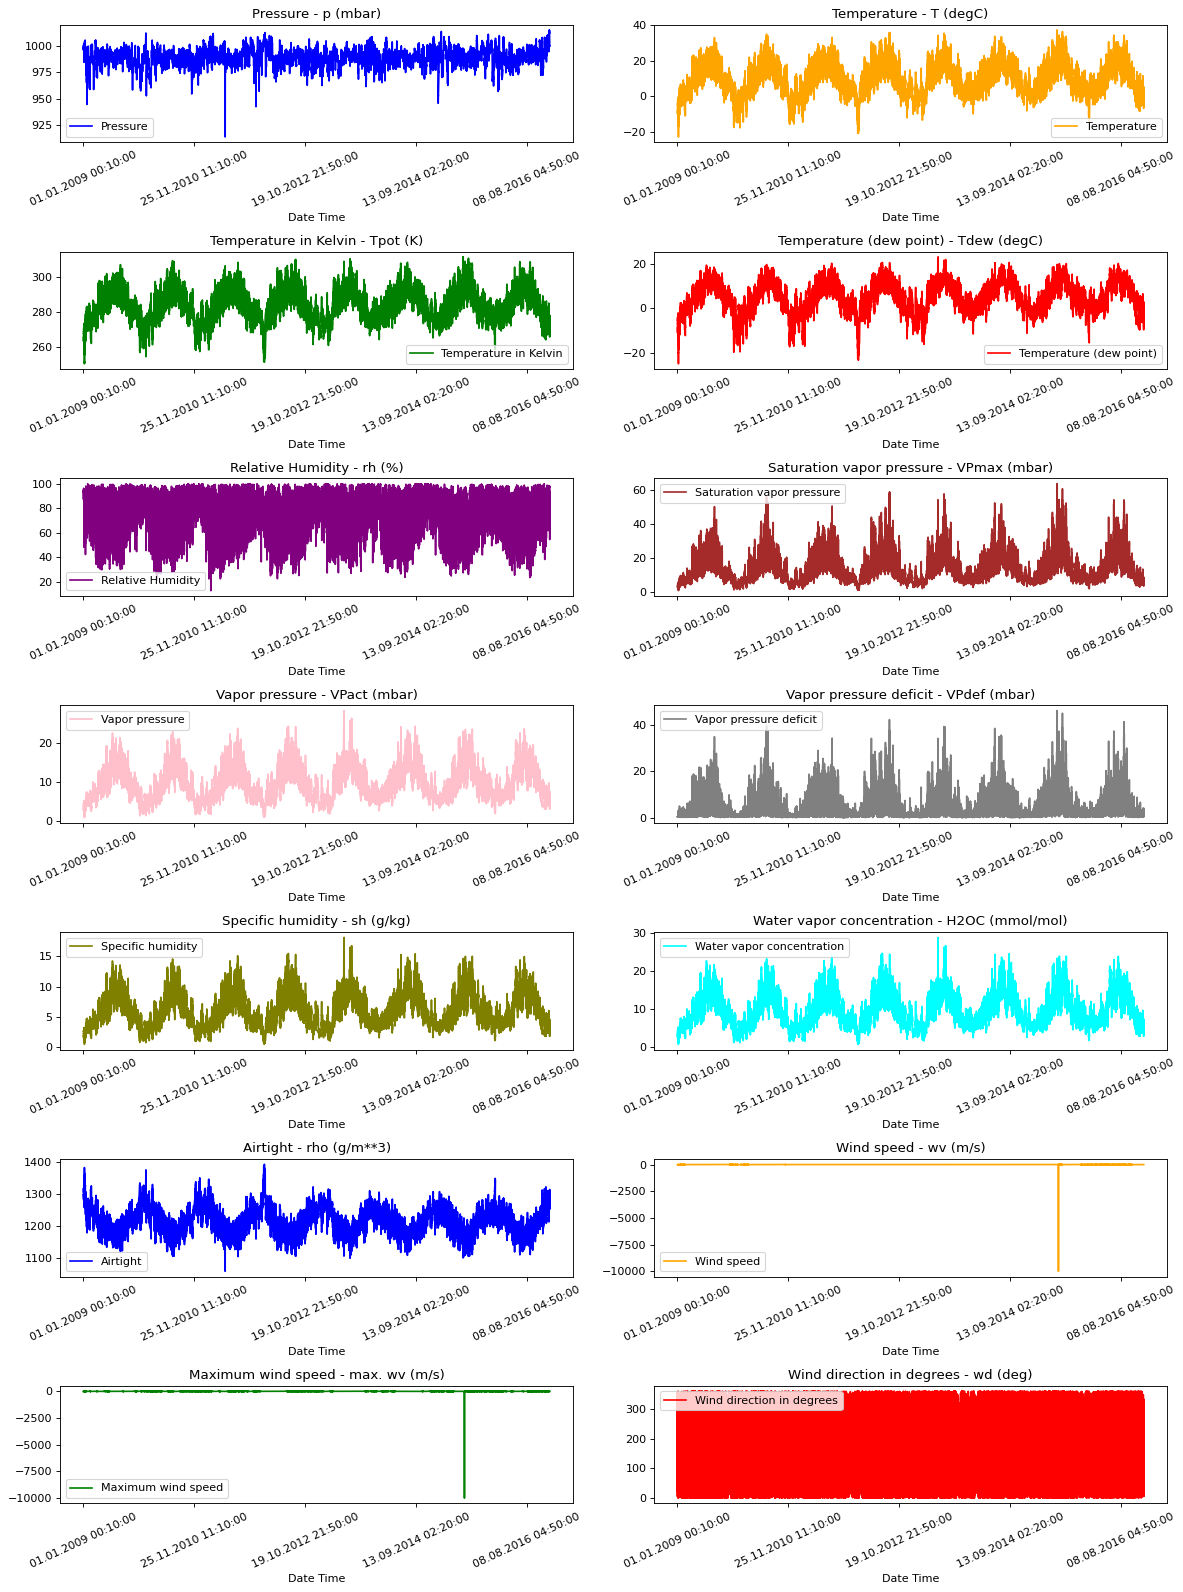

In [6]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

In [7]:
head_list = list(df.columns)
print(head_list)

['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']


In [8]:
df_clear = df.copy()

In [9]:
dfmedian = df.median(axis=0, skipna=None, level=None, numeric_only=None)
print(dfmedian)

p (mbar)            989.58
T (degC)              9.42
Tpot (K)            283.47
Tdew (degC)           5.22
rh (%)               79.30
VPmax (mbar)         11.82
VPact (mbar)          8.86
VPdef (mbar)          2.19
sh (g/kg)             5.59
H2OC (mmol/mol)       8.96
rho (g/m**3)       1213.79
wv (m/s)              1.76
max. wv (m/s)         2.96
wd (deg)            198.10
dtype: float64


In [10]:
print(dfmedian['wv (m/s)'])
print(dfmedian['max. wv (m/s)'])
# print(dfmean['wv (m/s)'])
# print(dfmean['max. wv (m/s)'])

1.76
2.96


In [11]:
df_clear.loc[df_clear['wv (m/s)'] <= -9000, 'wv (m/s)'] = dfmedian['wv (m/s)']
df_clear.loc[df_clear['max. wv (m/s)'] <= -9000, 'max. wv (m/s)'] = dfmedian['max. wv (m/s)']

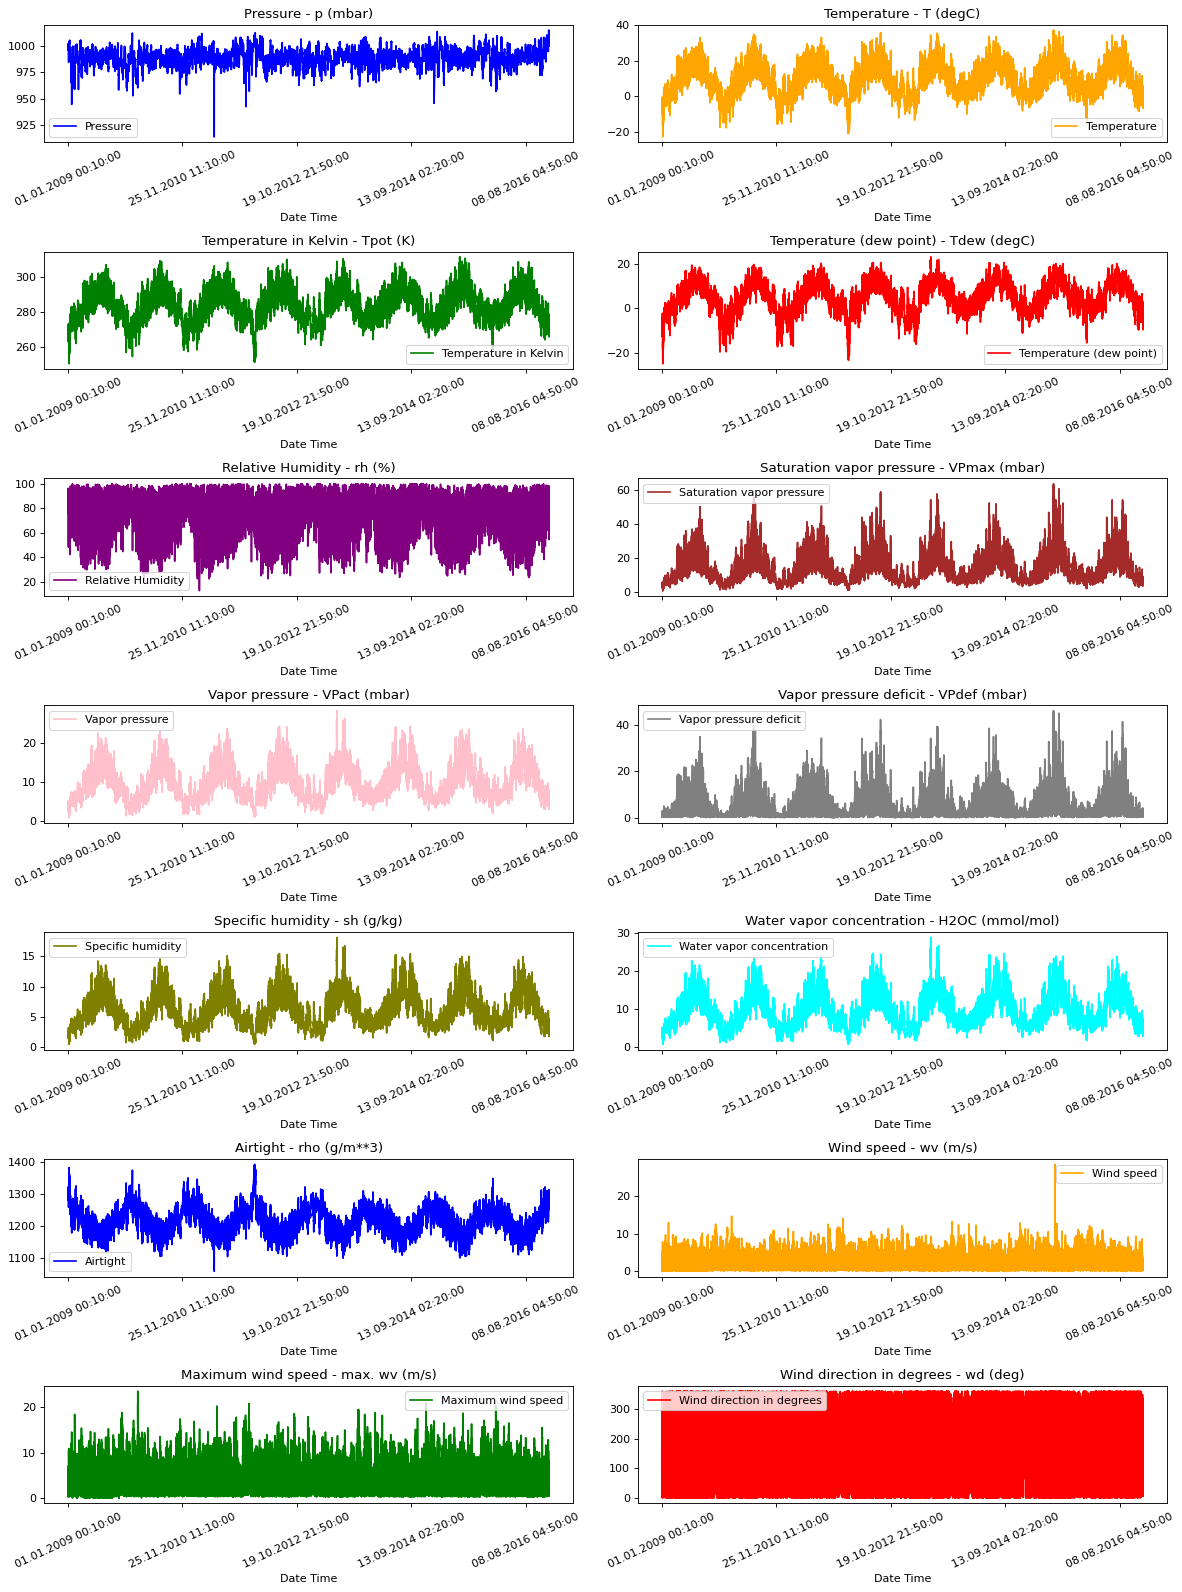

In [12]:
show_raw_visualization(df_clear)

In [13]:
split_fraction = 0.715
train_split = int(split_fraction * int(df_clear.shape[0]))

print('len_train:', train_split, '/', df_clear.shape[0])

def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

len_train: 300693 / 420551


In [14]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [1]]),
)
selected_features = [feature_keys[i] for i in [1]]
features = df_clear[selected_features]
features.index = df_clear[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]
print('train_data', train_data.shape)
print('val_data', val_data.shape)

The selected parameters are: Temperature
train_data (300693, 1)
val_data (119858, 1)


In [25]:
data_mean = df_clear[selected_features].values[:train_split].mean(axis=0)
print(data_mean)
data_std = df_clear[selected_features].values[:train_split].std(axis=0)
print(data_std)

[9.25020396]
[8.63501564]


In [17]:
step = 6                # 1 hour
past = 720              # 5 days
future = 72             # 12 hour
learning_rate = 0.001
batch_size = 256
epochs = 10

start = past + future       # 720 + 72 = 5,5 days 
end = start + train_split   # 792 + 300693 = 301485

x_train = train_data[[i for i in range(train_data.shape[1])]].values    # все треннировочные значения по всем колонкам
y_train = features.iloc[start:end]     # температура с 792 по 301485

sequence_length = int(past / step)

print('start', start)
print('end', end)
print('sequence_length', sequence_length)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

start 792
end 301485
sequence_length 120
x_train (300693, 1)
y_train (300693, 1)


In [18]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
print('dataset_train', dataset_train)

dataset_train <BatchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>


In [20]:
x_end = len(val_data) - past - future
print('len(val_data)', len(val_data))
print('past', past)
print('future', future)
print('x_end:', x_end)

label_start = train_split + past + future
print('train_split:', train_split)
print('label_start:', label_start)

x_val = val_data.iloc[:x_end].values
y_val = features.iloc[label_start:]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

print('dataset_val:', dataset_val)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

len(val_data) 119858
past 720
future 72
x_end: 119066
train_split: 300693
label_start: 301485
dataset_val: <BatchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>
Input shape: (256, 120, 1)
Target shape: (256, 1)


In [41]:
# ----------------------------------------------
#          ***  CLEAR SESSION  ***
# not run
from tensorflow.keras import backend as K
del model
K.clear_session()
# ==============================================

In [42]:
from tensorflow.keras.regularizers import L2
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# lstm_out = keras.layers.LSTM(64)(inputs)
lstm_out = keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2)(inputs)
# lstm_out = keras.layers.LSTM(16, kernel_regularizer=L2(l2=0.01),
#     recurrent_regularizer=L2(l2=0.01), bias_regularizer=L2(l2=0.01))(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
not run
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file=join(base_dir, 'model_lstm_01.png'))

In [40]:
# not run
%%time
start_work = time.time()
print('Start work at:', datetime.datetime.now().strftime("%H:%M:%S %Y.%m.%d"))

save_index = '11' # only temperature

path_checkpoint = join(dataset_dir, "model_checkpoint_{}.h5".format(save_index))
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=8,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

print("\nAll work took {} minutes {} seconds".format(*seconds_to_m_s(time.time() - start_work)))

Start work at: 17:18:23 2020.10.05
Epoch 1/8
1172/1172 [==============================] - ETA: 0s - loss: 0.1976 - mae: 0.3367
Epoch 00001: val_loss improved from inf to 0.17565, saving model to /content/drive/My Drive/Datasets/jena_climate/model_checkpoint_11.h5
1172/1172 [==============================] - 479s 408ms/step - loss: 0.1976 - mae: 0.3367 - val_loss: 0.1757 - val_mae: 0.3255
Epoch 2/8
1172/1172 [==============================] - ETA: 0s - loss: 0.1654 - mae: 0.3170
Epoch 00002: val_loss did not improve from 0.17565
1172/1172 [==============================] - 492s 420ms/step - loss: 0.1654 - mae: 0.3170 - val_loss: 0.1800 - val_mae: 0.3316
Epoch 3/8
1172/1172 [==============================] - ETA: 0s - loss: 0.1603 - mae: 0.3127
Epoch 00003: val_loss did not improve from 0.17565
1172/1172 [==============================] - 496s 423ms/step - loss: 0.1603 - mae: 0.3127 - val_loss: 0.1804 - val_mae: 0.3329
Epoch 4/8
1172/1172 [==============================] - ETA: 0s - loss

In [43]:
# not run
model.load_weights(join(dataset_dir, "model_checkpoint_09.h5"))

In [44]:
%%time
validation = model.evaluate(dataset_val, verbose=1, return_dict=True)
print(validation)
mae = validation['mae'] * data_std[0] + data_mean[0]
print(mae, 'degC')
# print('mae = {0:.2f} degC, erorr = {1:.02f} %'.format(mae, mae*100/t_range))

463/463 [==============================] - 24s 52ms/step - loss: 0.1358 - mae: 0.2909
{'loss': 0.1357724517583847, 'mae': 0.2908971905708313}
11.762105753208125 degC
CPU times: user 35.5 s, sys: 7.91 s, total: 43.5 s
Wall time: 24.4 s


In [45]:
t_min = df_clear['T (degC)'].min(axis=0)
t_max = df_clear['T (degC)'].max(axis=0)
t_range = np.abs(t_min) + np.abs(t_max)
print('t_min', t_min)
print('t_max', t_max)
print('t_range', round(t_range, 2))
print('mae = {0:.2f} degC, erorr = {1:.02f} %'.format(mae, mae*100/t_range))

t_min -23.01
t_max 37.28
t_range 60.29
mae = 11.76 degC, erorr = 19.51 %


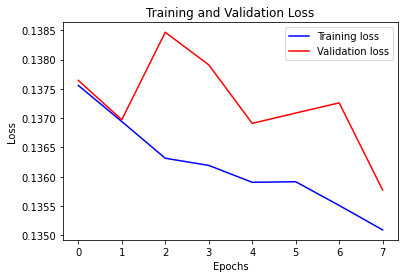

In [30]:
not run
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")

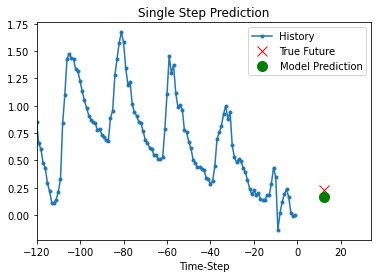

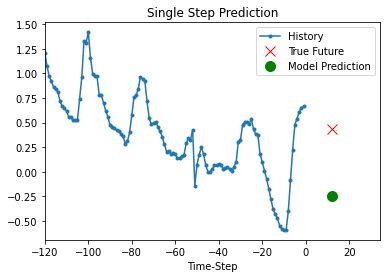

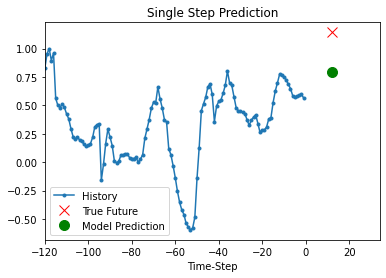

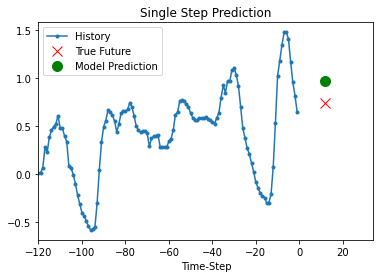

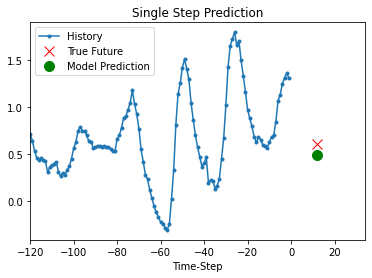

In [46]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0].numpy(), y[0].numpy(), model.predict(x)[0]],
        12, # 12 hour or 0.5 day
        "Single Step Prediction",
    )

In [ ]:
%%time
n_batch_train = [i for i,_ in enumerate(dataset_train)][-1] + 1
n_batch_train

In [ ]:
%%time
n_batch_val = [i for i,_ in enumerate(dataset_val)][-1] + 1
n_batch_val

In [ ]:
for batch in dataset_val.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(300693, 7)
(300693, 1)
(119066, 7)
(119066, 1)


In [47]:
# step = 6                # 1 hour
# past = 720              # 5 days
# future = 72             # 12 hour
pred_len = 72            # 12 hour
n_val_steps = 463 # up calculate

plot_len = past + future + pred_len
print('Batch_size:', batch_size)
print('Step:', step)
print('Past:', past)
print('Future:', future)
print('Prediction length:', pred_len)
pred_len_step = int(pred_len/step)
print('Prediction length step:', pred_len_step)
plot_len_step = int(plot_len/step)
print('Plot length: {0} / {1} = {2:.2f}'.format(plot_len, step, plot_len/step))
n_val_samples = batch_size * n_val_steps
print('Number of validation samples:', n_val_samples)
val_space = n_val_samples + past - 1
print('Val space requirement:', val_space)
n_pred_samples = val_space - plot_len + 1
print('Number of samples for prediction:', n_pred_samples)
print('Unused number of samples:', n_val_samples - n_pred_samples)

Batch_size: 256
Step: 6
Past: 720
Future: 72
Prediction length: 72
Prediction length step: 12
Plot length: 864 / 6 = 144.00
Number of validation samples: 118528
Val space requirement: 119247
Number of samples for prediction: 118384
Unused number of samples: 144


In [48]:
predictions = np.zeros((n_pred_samples, pred_len_step))
print('Predictions shape:', predictions.shape)
mae_score = np.zeros((n_pred_samples, pred_len_step))
print('MAE score shape:', mae_score.shape)

Predictions shape: (118384, 12)
MAE score shape: (118384, 12)


In [75]:
%%time
for i, (x_cur, y_cur) in enumerate(dataset_val.take(n_pred_samples)):
    # print(x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0])
    
    # x_pred = np.zeros((past_step, n_params))
    x_orig = x_cur[0].numpy()
    y_orig = y_cur[0].numpy()
    x_pred = np.zeros(x_orig.shape)
    # print(x_orig.shape)
    # print(y_orig.shape)
    # print(x_pred.shape)
    
    for ind in range(pred_len_step):
        if ind != 0:
            x_pred[:-1] = x_pred[1:]
            x_pred[-1] = pred
        else:
            x_pred[:] = x_orig[:]
        
        pred = model.predict(np.expand_dims(x_pred, axis=0))[0][0]
        # print(pred)
        # break

    predictions[i] = np.ravel(x_pred[-pred_len_step:]) * data_std[0] + data_mean[0]
    # print(predictions[i])
    # print(predictions[i].shape)  
    
    # break

    

In [57]:
# print(plot_len)
print(train_split)

300693


In [64]:
plot_samples = np.zeros((n_pred_samples, plot_len_step))
print('plot_samples.shape:', plot_samples.shape)

for i in range(n_pred_samples):
    # print(df_clear['T (degC)'].iloc[train_split+i*plot_len : train_split+(i+1)*plot_len : 6].values.copy().shape)
    # print('[', train_split+i, ':', train_split+i+plot_len, ']')
    plot_samples[i] = df_clear['T (degC)'].iloc[train_split+i : train_split+i+plot_len : 6].values.copy()
    # if i > 2:
        # break

    

print(plot_samples[0].shape)
print(plot_samples[1].shape)


plot_samples.shape: (118384, 144)
(144,)
(144,)


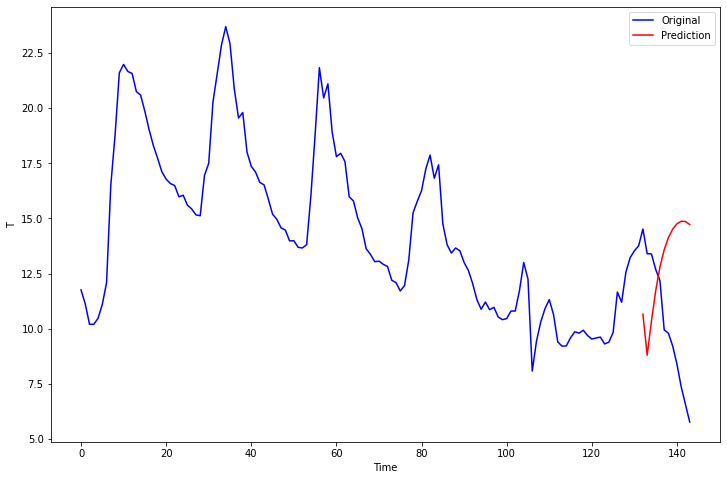

In [105]:
# plot_ind = 7
plot_ind = plot_ind + 1
plt.figure(figsize=(12,8))
plt.plot(range(plot_len_step), plot_samples[plot_ind], "b", label="Original")
plt.plot(range((past+future)//6, plot_len_step), predictions[plot_ind], "r", label="Prediction")
plt.xlabel("Time")
plt.ylabel("T")
plt.legend()
plt.show()

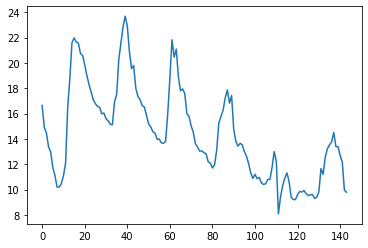

In [61]:
plt.plot()

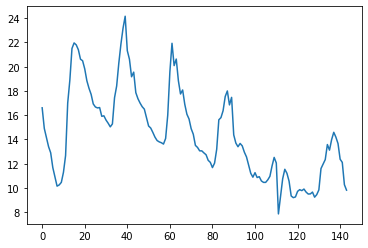

In [62]:
plt.plot(range(plot_len_step), plot_samples[1])

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6])
print(arr.shape)

(6,)


In [ ]:
ind = 1
print(arr[:-(ind+1)])

[1 2 3 4]


In [ ]:
zero = np.array([10, 20, 30, 40, 50, 60])

one = np.array([11, 21, 31, 41, 51, 61])

# tem = np.array([0, 0, 0, 0, 0, 0])

for ind in range(6):
    if ind != 0:
        # print(tem[1:], '<-', tem[:-1])
        tem[:-1] = tem[1:]
        tem[-1] = pred
        print('pred:', pred)
    else:
        tem[:] = zero[:]

    pred = arr[ind]
            
    print(tem)




[10 20 30 40 50 60]
pred: 1
[20 30 40 50 60  1]
pred: 2
[30 40 50 60  1  2]
pred: 3
[40 50 60  1  2  3]
pred: 4
[50 60  1  2  3  4]
pred: 5
[60  1  2  3  4  5]
